In [1]:
import pandas as pd

file_path = '../data/train.csv'
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

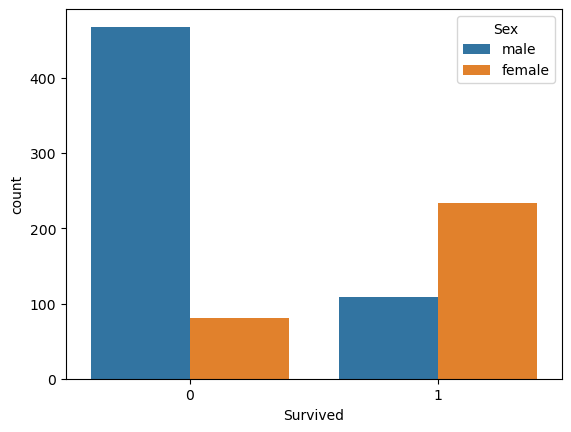

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['AgeGroup'] = df['Age'].apply(lambda age: 'Child' if age < 18 else 'Adult')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


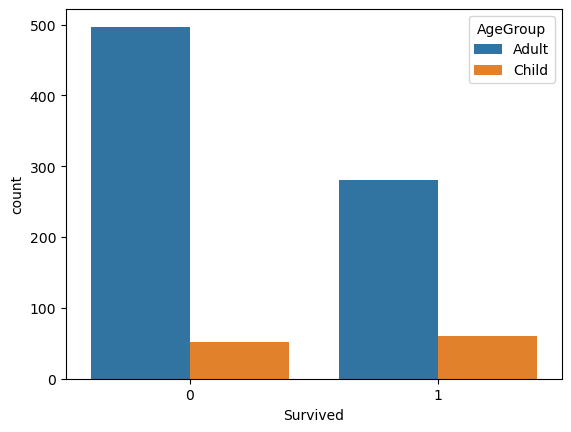

In [10]:
sns.countplot(x='Survived', hue='AgeGroup', data=df)
plt.show()

In [11]:
print(df.groupby('AgeGroup')['Survived'].value_counts(normalize=True))

AgeGroup  Survived
Adult     0           0.638817
          1           0.361183
Child     1           0.539823
          0           0.460177
Name: proportion, dtype: float64


In [12]:

surviving_children = df[(df['AgeGroup'] == 'Child') & (df['Survived'] == 1)]


deceased_children = df[(df['AgeGroup'] == 'Child') & (df['Survived'] == 0)]

In [13]:
print("--- Возраст ВЫЖИВШИХ детей ---")
print(surviving_children['Age'].describe())

print("\n--- Возраст ПОГИБШИХ детей ---")
print(deceased_children['Age'].describe())

--- Возраст ВЫЖИВШИХ детей ---
count    61.000000
mean      7.888033
std       6.129831
min       0.420000
25%       3.000000
50%       5.000000
75%      15.000000
max      17.000000
Name: Age, dtype: float64

--- Возраст ПОГИБШИХ детей ---
count    52.000000
mean     10.394231
std       5.674450
min       1.000000
25%       5.500000
50%      10.500000
75%      16.000000
max      17.000000
Name: Age, dtype: float64


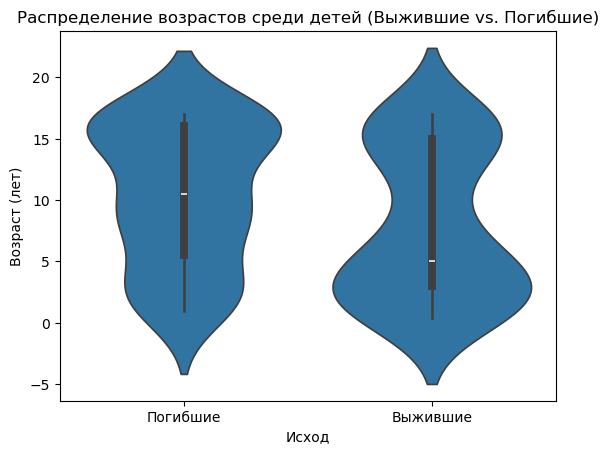

In [17]:

children_df = df[df['AgeGroup'] == 'Child']


sns.violinplot(x='Survived', y='Age', data=children_df)


plt.title('Распределение возрастов среди детей (Выжившие vs. Погибшие)')
plt.xticks([0, 1], ['Погибшие', 'Выжившие']) 
plt.xlabel('Исход')
plt.ylabel('Возраст (лет)')

plt.show()


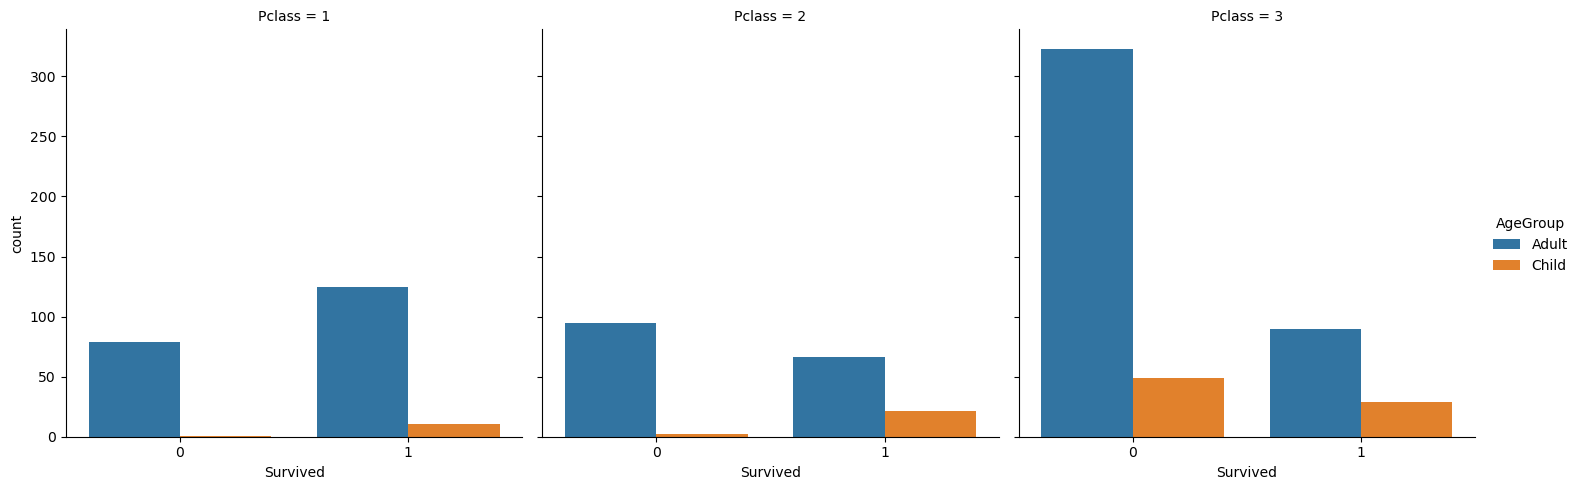

In [18]:
sns.catplot(x='Survived', col='Pclass', hue='AgeGroup', data=df, kind='count')
plt.show()